# Project: Wrangling and Analyze Data

In [108]:
!pip install tqdm

In [109]:
import requests
import tweepy
import time
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

% matplotlib inline

UsageError: Line magic function `%` not found.


Set options for pandas to display all columns.

In [110]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [111]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [112]:
# response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# with open("image_predictions.tsv", mode='xb') as file:
#     file.write(response.content)

In [113]:
image_predictions_df = pd.read_csv('image_predictions.tsv' , sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

API keys have been removed for submission and the code block does not need to be run anyway as the api has already been queried and the tweets downloaded.

In [114]:
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [115]:
# test for querying
# tweet_id = archive_df.tweet_id[2]
# tweet = api.get_status(tweet_id, tweet_mode='extended')

The following block is commented out as the file has now been written.

In [116]:
# T0 = time.perf_counter()
# failed = {}

# n_tweets = len(archive_df.tweet_id)

# # using tqdm as a progress bar
# with tqdm(n_tweets,desc='progress') as pbar:
#     with open("tweet_json.txt", 'w') as file:
#         for tweet_id in archive_df.tweet_id:
#             try:
#                 tweet = api.get_status(tweet_id)
#                 json.dump(tweet._json,file)
#                 file.write('\n')
#             except Exception as e:
#                 failed[tweet_id] = e
#             pbar.update(1)

# print(f"Took {time.perf_counter()-T0} s.")

Write failed tweets to file.

In [117]:
# with open('failed_tweets.txt', 'w') as failed_file:
#     for key, value in failed.items():
#         value = str(value).replace("\n",',')
#         failed_file.write(f"{key} : {value}\n")    

Read in the tweet_json.txt file.

In [118]:
json_dict = {}
count = 1
with open("tweet_json.txt",'r') as file:
    for line in file: 
        json_dict[count] = json.loads(line)
        count += 1

tweet_json_df = pd.DataFrame.from_dict(json_dict,orient='index')

Filter to just the columns desired for analysis.

In [119]:
tweet_json_filtered_df = tweet_json_df[['id','retweet_count','favorite_count']]

## Assessing Data

### Visual Assessment

Display the DataFrames to view overall structure.

In [120]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [121]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [122]:
tweet_json_filtered_df

,id,retweet_count,favorite_count
1,892420643555336193,6975,33710
2,892177421306343426,5276,29234
3,891815181378084864,3466,21982
4,891689557279858688,7197,36808
5,891327558926688256,7721,35191
...,...,...,...
2323,666049248165822465,36,88
2324,666044226329800704,115,246
2325,666033412701032449,36,100
2326,666029285002620928,39,112


### Programmatic assessment

Use .info() to see all columns and datatypes.

In [123]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [124]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [125]:
tweet_json_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 1 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 72.7 KB


In [126]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [127]:

archive_df[archive_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [128]:
archive_df[archive_df.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [129]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Tebow        1
Duchess      1
Lassie       1
Arya         1
Jeffri       1
Name: name, Length: 957, dtype: int64

### Quality issues
1. Dog rating in 'archive_df' split into numerator and denominator and could be normalised out of 10 in a single column

2. Missing dog names or incorrect names such as "a" in 'archive_df'

3. Some dog breed predictions are not dog breeds in 'image_predictions_df'

4. Some dog breed predictions start with lowercase letters and others with uppercase letters and some have underscores instead of spaces

5. Some of the tweets are retweets or replies

6. Timestamp in 'archive_df' is of datatype object and should be of datatype datetime and the post time and post date should be in seperate columns

7. 'id' column in 'tweet_json_filtered_df' should be named 'tweet_id' the tweet_id should be of datatype object not int64

8. 'source' column in 'archive_df' could be simplified and converted to categorical datatype

### Tidiness issues
1. There are 3 tables for the same set of observations which should be in one table
2. There are 4 columns for doggo, floofer, pupper and puppo which should be in a single column

## Cleaning Data

Make Copy of the original pieces of data

In [130]:
archive_df_copy = archive_df.copy()

In [131]:
image_predictions_df_copy = image_predictions_df.copy()

In [132]:
tweet_json_df_filtered_copy = tweet_json_filtered_df.copy()

Note: I have cleaned the issues in a different order than specified above. I will address issue 7 of quality first to allow the datasets to be merged. I will then merge the datasets and resolve the remaining tidiness issue followed by resolving the remaining quality issues.

### Quality Issue #7: 'id' column in 'tweet_json_filtered_df' should be named 'tweet_id' and be of datatype object not int64

#### Define:
Convert tweet_id to object datatype in all 3 tables and rename the 'id' column of 'tweet_json_df_filtered_copy' to 'tweet_id'.

#### Code:

In [133]:
tweet_json_df_filtered_copy.rename({'id':'tweet_id'}, axis=1, inplace=True)

Use astype_str to convert to string/object data type.

In [134]:
tweet_json_df_filtered_copy.tweet_id = tweet_json_df_filtered_copy.tweet_id.astype(str)
archive_df_copy.tweet_id = archive_df_copy.tweet_id.astype(str)
image_predictions_df_copy.tweet_id = image_predictions_df_copy.tweet_id.astype(str)

#### Test:

In [135]:
tweet_json_df_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 1 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 72.7+ KB


In [136]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [137]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness issue #1: There are 3 tables for the same set of observations which should be in one table.

#### Define:
Merge the 3 tables into a master dataset.

#### Code:

In [138]:
twitter_archive_master = archive_df_copy.merge(tweet_json_df_filtered_copy,on='tweet_id')

In [139]:
twitter_archive_master = twitter_archive_master.merge(image_predictions_df_copy,on='tweet_id')

In [140]:
# Make a copy to contiue cleaning
twitter_archive_master_copy = twitter_archive_master.copy()

#### Test:

In [141]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

In [142]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
123,862831371563274240,NaN,NaN,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zooey. She's the world's biggest fan o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862831371...,13,10,Zooey,None,None,None,None,4446,17189,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
959,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None,2259,5858,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
801,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,None,None,None,None,606,2042,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,7197,36808,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
558,785170936622350336,NaN,NaN,2016-10-09 17:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hero. He was enjoying the car ride unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785170936...,11,10,Hero,None,None,None,None,4481,11332,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True


### Tidiness issue #2: There are 4 columns for doggo, floofer, pupper and puppo which should be in a single column.

#### Define: 
Use the numpy select function to set the value in a new column called 'dog_stage' to the value contained in one of the four of doggo, floofer, pupper or puppo, if none are found instead set it to 'dog'. Convert the datatype to category.


#### Code:

In [143]:
twitter_archive_master_copy['dog_stage'] = np.select([twitter_archive_master_copy['doggo'] == 'doggo',
                                                      twitter_archive_master_copy['floofer'] == 'floofer',
                                                      twitter_archive_master_copy['pupper'] == 'pupper',
                                                      twitter_archive_master_copy['puppo'] == 'puppo'],
                                                     ['doggo','floofer','pupper','puppo']
                                                     )

If dog stage is missing replact it with dog to indicate the lack of stage.

In [144]:
twitter_archive_master_copy['dog_stage'].replace('0','dog',inplace=True)

In [145]:
twitter_archive_master_copy.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

Convert to category data type

In [146]:
twitter_archive_master_copy['dog_stage'].astype("category");

#### Test:

In [147]:
twitter_archive_master_copy['dog_stage'].value_counts(0)

dog        1739
pupper      210
doggo        78
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [148]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  retweet_count               2057 

### Quality Issue #1: Dog rating in 'archive_df' split into numerator and denominator and could be normalised out of 10 in a single column.

#### Define:
The dog rating in the 'archive_df table' is split into numerator and denominator. The ratings are not always out of 10 which is part of the uniqueness of WeRateDogs. Divide the numerator value by the denominator and then multiply by 10 to get a normalised value as a float. Drop the denominator column as the ratings will all be out of 10. Rename the numerator column to 'rating_out_of_10'.

#### Code

In [149]:
twitter_archive_master_copy['rating_numerator'].describe()

count    2057.000000
mean       12.265921
std        40.857799
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Normalise to out of 10

In [150]:
twitter_archive_master_copy['rating_numerator'] = twitter_archive_master_copy['rating_numerator'] / twitter_archive_master_copy['rating_denominator'] * 10

In [151]:
twitter_archive_master_copy.drop(['rating_denominator'],axis=1,inplace=True)

In [152]:
twitter_archive_master_copy.rename({'rating_numerator':'rating_out_of_10'},axis=1,inplace=True);

#### Test

In [153]:
twitter_archive_master_copy['rating_out_of_10'].describe()

count    2057.000000
mean       11.695591
std        40.043492
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_out_of_10, dtype: float64

The max value was actually set as 1776 out of 10. Impressive dog score!

In [154]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_out_of_10            2057 non-null   float64
 11  name                        2057 non-null   object 
 12  retweet_count               2057 non-null   int64  
 13  favorite_count              2057 

### Quality Issue #2: Missing dog names or incorrect names such as "a" in 'archive_df'.

It would be possible to find each missing name in the 'text' column and replace the missing names. However this would take a lot of time as there over 500 incorrect names. Instead of dropping the columns without a legitimate name the obviously incorrect dog names can be replaced with 'None'.

#### Define
Replace incorrect names with 'None' in the cases where it is not already 'None'.

#### Code

In [155]:
twitter_archive_master_copy['name'].replace(['a','an','one','the','by','his','just','quite','very'],'None',inplace=True)

#### Test

In [156]:
twitter_archive_master_copy['name'].value_counts()

None           657
Tucker          10
Penny           10
Cooper          10
Charlie         10
              ... 
infuriating      1
Hanz             1
Evy              1
Maisey           1
Jim              1
Name: name, Length: 925, dtype: int64

### Quality Issue #3: Some dog breed predictions are not dog breeds in 'image_predictions_df'

#### Define:
Use the numpy where function to change the value in the 'p1' column to 'none found' if the values in 'p1_dog', 'p2_dog' and 'p3_dog' are all equal to False. if 'p1_dog' is False but 'p2_dog' or 'p3_dog' is True instead replace 'p1' with the value in 'p2' or 'p3'. Drop the columns 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog'. Rename the p1 column to 'dog_breed_prediction'.


#### Code:

Nested np.where functions for the conditionals are used.

In [157]:
twitter_archive_master_copy['p1'] = np.where(twitter_archive_master_copy.p1_dog == False,
                                             np.where(twitter_archive_master_copy.p2_dog == False,
                                                      np.where(twitter_archive_master_copy.p3_dog == False,
                                                               'none found',
                                                               twitter_archive_master_copy['p3']),
                                                      twitter_archive_master_copy['p2']),
                                             twitter_archive_master_copy['p1'])

In [158]:
twitter_archive_master_copy.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis=1,inplace=True)

In [159]:
twitter_archive_master_copy.rename({'p1':'dog_breed_prediction'},axis=1,inplace=True);

#### Test:

In [160]:
twitter_archive_master_copy['dog_breed_prediction'].value_counts()

none found              321
golden_retriever        173
Labrador_retriever      109
Pembroke                 95
Chihuahua                93
                       ... 
Scotch_terrier            1
standard_schnauzer        1
Japanese_spaniel          1
Bouvier_des_Flandres      1
silky_terrier             1
Name: dog_breed_prediction, Length: 114, dtype: int64

In [161]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_out_of_10            2057 non-null   float64
 11  name                        2057 non-null   object 
 12  retweet_count               2057 non-null   int64  
 13  favorite_count              2057 

### Quality Issue #4: Some dog breed predictions start with lowercase letters and others with uppercase letters and some have underscores instead of spaces.

#### Define:
Use lambda functions to apply the .lower method on the 'dog_breed_prediction' column and to replace the underscores with spaces.

#### Code:

In [162]:
twitter_archive_master_copy['dog_breed_prediction'] = twitter_archive_master_copy['dog_breed_prediction'].apply(lambda x : x.lower());

In [163]:
twitter_archive_master_copy['dog_breed_prediction'] = twitter_archive_master_copy['dog_breed_prediction'].apply(lambda x : x.replace('_',' '));

#### Test:

In [164]:
twitter_archive_master_copy['dog_breed_prediction'].sample(5)

1597    labrador retriever
255               cardigan
219             none found
1885      english springer
1867              airedale
Name: dog_breed_prediction, dtype: object

### Quality Issue #5: Some of the tweets are retweets or replies

#### Define:
Drop all of the rows where the value in the 'retweeted_status_id' or 'in_reply_to_status_id' is in not null (i.e. it is a retweet or reply so has an associated retweet or reply id). Then drop all columns involving retweet status or reply.

#### Code:

In [165]:
twitter_archive_master_copy.drop(twitter_archive_master_copy[twitter_archive_master_copy.retweeted_status_id.notnull()].index,axis=0,inplace=True)
twitter_archive_master_copy.drop(twitter_archive_master_copy[twitter_archive_master_copy.in_reply_to_status_id.notnull()].index,axis=0,inplace=True)


#### Test:

In [166]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1963 non-null   object 
 4   source                      1963 non-null   object 
 5   text                        1963 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1963 non-null   object 
 10  rating_out_of_10            1963 non-null   float64
 11  name                        1963 non-null   object 
 12  retweet_count               1963 non-null   int64  
 13  favorite_count              1963 

#### Code:

In [167]:
twitter_archive_master_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'],axis=1,inplace=True)

#### Test:

In [168]:
twitter_archive_master_copy[twitter_archive_master_copy.text.str[:2] == 'RT']

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed_prediction,dog_stage
1571,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10.0,None,526,1148,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,west highland white terrier,dog


This text starting with RT is not a retweet so all the retweets are gone

In [169]:
twitter_archive_master_copy[twitter_archive_master_copy.text.str[:1] == '@']

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed_prediction,dog_stage


### Quality Issue #6:
Timestamp in 'archive_df' is of datatype object and should be of datatype datetime and the post time and post date should be in seperate columns

#### Define:
Use the pandas to_datetime function to get the date and time from the 'timestamp' column and put these into 'post_date' and 'post_time' columns. Drop the timestamp column

#### Code:

Convert to datetime then extract the date or time with '.dt.date' and '.dt.time'

In [170]:
twitter_archive_master_copy['post_date'] = pd.to_datetime(twitter_archive_master_copy.timestamp).dt.date
twitter_archive_master_copy['post_time'] = pd.to_datetime(twitter_archive_master_copy.timestamp).dt.time

In [171]:
twitter_archive_master_copy.drop(['timestamp'],axis=1,inplace=True)

#### Test:

In [172]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1963 non-null   object 
 1   source                1963 non-null   object 
 2   text                  1963 non-null   object 
 3   expanded_urls         1963 non-null   object 
 4   rating_out_of_10      1963 non-null   float64
 5   name                  1963 non-null   object 
 6   retweet_count         1963 non-null   int64  
 7   favorite_count        1963 non-null   int64  
 8   jpg_url               1963 non-null   object 
 9   img_num               1963 non-null   int64  
 10  dog_breed_prediction  1963 non-null   object 
 11  dog_stage             1963 non-null   object 
 12  post_date             1963 non-null   object 
 13  post_time             1963 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 230.0+ KB


In [173]:
twitter_archive_master_copy['post_date']


0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2052    2015-11-16
2053    2015-11-16
2054    2015-11-15
2055    2015-11-15
2056    2015-11-15
Name: post_date, Length: 1963, dtype: object

In [174]:
twitter_archive_master_copy['post_time']

0       16:23:56
1       00:17:27
2       00:18:03
3       15:58:51
4       16:00:24
          ...   
2052    00:24:50
2053    00:04:52
2054    23:21:54
2055    23:05:30
2056    22:32:08
Name: post_time, Length: 1963, dtype: object

### Quality Issue #8: 'source' column in 'archive_df' could be simplified and converted to categorical datatype

#### Define:
There are four different sources which are cluttered with links. Replace the cluttered names with the names of sources using the numpy select function. Convert the datatype to category.

#### Code:

In [175]:
twitter_archive_master_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1925
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Note there are now no longer and tweets from the source vine but the code for it is still included for if they were still there.

In [176]:
twitter_archive_master_copy['source'] = np.select([twitter_archive_master_copy['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                   twitter_archive_master_copy['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                   twitter_archive_master_copy['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                   twitter_archive_master_copy['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                                                   ['Twitter for IPhone','Vine','Twitter Web Client','TweetDeck']
                                                  )

In [177]:
twitter_archive_master_copy['source'].astype('category');

#### Test:

In [178]:
twitter_archive_master_copy['source'].value_counts()

Twitter for IPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Finishing Touches:

In [179]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1963 non-null   object 
 1   source                1963 non-null   object 
 2   text                  1963 non-null   object 
 3   expanded_urls         1963 non-null   object 
 4   rating_out_of_10      1963 non-null   float64
 5   name                  1963 non-null   object 
 6   retweet_count         1963 non-null   int64  
 7   favorite_count        1963 non-null   int64  
 8   jpg_url               1963 non-null   object 
 9   img_num               1963 non-null   int64  
 10  dog_breed_prediction  1963 non-null   object 
 11  dog_stage             1963 non-null   object 
 12  post_date             1963 non-null   object 
 13  post_time             1963 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 230.0+ KB


In [180]:
twitter_archive_master_copy.sample(5)

,tweet_id,source,text,expanded_urls,rating_out_of_10,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed_prediction,dog_stage,post_date,post_time
1188,697616773278015490,Twitter for IPhone,This pupper doubles as a hallway rug. Very rar...,https://twitter.com/dog_rates/status/697616773...,11.0,None,921,2890,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,1,lhasa,pupper,2016-02-11,03:02:54
2055,666029285002620928,Twitter for IPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,None,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,dog,2015-11-15,23:05:30
2047,666058600524156928,Twitter for IPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,None,47,99,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,dog,2015-11-16,01:01:59
721,758405701903519748,Twitter for IPhone,This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...,10.0,Odie,1756,4861,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,chesapeake bay retriever,dog,2016-07-27,20:56:24
1433,680609293079592961,Twitter for IPhone,This is Brody. That is his chair. He loves his...,https://twitter.com/dog_rates/status/680609293...,9.0,Brody,623,2407,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,french bulldog,dog,2015-12-26,04:41:15


The expanded_urls and img_num columns can also be dropped now.

In [181]:
twitter_archive_master_copy.drop(['expanded_urls','img_num'],axis=1,inplace=True)

In [182]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1963 non-null   object 
 1   source                1963 non-null   object 
 2   text                  1963 non-null   object 
 3   rating_out_of_10      1963 non-null   float64
 4   name                  1963 non-null   object 
 5   retweet_count         1963 non-null   int64  
 6   favorite_count        1963 non-null   int64  
 7   jpg_url               1963 non-null   object 
 8   dog_breed_prediction  1963 non-null   object 
 9   dog_stage             1963 non-null   object 
 10  post_date             1963 non-null   object 
 11  post_time             1963 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 199.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [183]:
twitter_archive_master_copy.to_csv('twitter_archive_master.csv',sep=',',index=False)

## Analyzing and Visualizing Data

Display the cleaned DataFrame with .head()

In [184]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,source,text,rating_out_of_10,name,retweet_count,favorite_count,jpg_url,dog_breed_prediction,dog_stage,post_date,post_time
0,892420643555336193,Twitter for IPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,6975,33710,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none found,dog,2017-08-01,16:23:56
1,892177421306343426,Twitter for IPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,5276,29234,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,dog,2017-08-01,00:17:27
2,891815181378084864,Twitter for IPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,3466,21982,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,dog,2017-07-31,00:18:03
3,891689557279858688,Twitter for IPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,7197,36808,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador retriever,dog,2017-07-30,15:58:51
4,891327558926688256,Twitter for IPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,7721,35191,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,dog,2017-07-29,16:00:24


The row with the greatest retweet count and favorite count can be found with idxmax.

In [185]:
master_df.loc[master_df['retweet_count'].idxmax()]

tweet_id                                               744234799360020481
source                                                 Twitter for IPhone
text                    Here's a doggo realizing you can stand in a po...
rating_out_of_10                                                       13
name                                                                 None
retweet_count                                                       70371
favorite_count                                                     144321
jpg_url                 https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed_prediction                                   labrador retriever
dog_stage                                                           doggo
post_date                                                      2016-06-18
post_time                                                        18:26:18
Name: 762, dtype: object

In [186]:
master_df.loc[master_df['favorite_count'].idxmax()]

tweet_id                                               744234799360020481
source                                                 Twitter for IPhone
text                    Here's a doggo realizing you can stand in a po...
rating_out_of_10                                                       13
name                                                                 None
retweet_count                                                       70371
favorite_count                                                     144321
jpg_url                 https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed_prediction                                   labrador retriever
dog_stage                                                           doggo
post_date                                                      2016-06-18
post_time                                                        18:26:18
Name: 762, dtype: object

In [222]:
master_df.loc[master_df['favorite_count'].idxmax()].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

It's the same dog. It looks like the url is for a video thumbnail which can be displayed in markdown.

Dog with highest retweets and favorites.

![](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

The data can be grouped by source and the average retweet and favorite counts displayed per source.

In [192]:
master_df.groupby('source').retweet_count.mean()

source
TweetDeck             1657.100000
Twitter Web Client    2078.464286
Twitter for IPhone    2253.605714
Name: retweet_count, dtype: float64

In [193]:
master_df.groupby('source').favorite_count.mean()

source
TweetDeck             3842.400000
Twitter Web Client    5130.642857
Twitter for IPhone    7788.325714
Name: favorite_count, dtype: float64

The count of each source should also be displayed to see if the values may be skewed by a large or small number of tweets per source.

In [194]:
master_df.groupby('source').favorite_count.count()

source
TweetDeck               10
Twitter Web Client      28
Twitter for IPhone    1925
Name: favorite_count, dtype: int64

The data can be grouped by the predicted dog breeds and the average favorite and retweet counts calculated. The top 5 can be displayed to see which dog breeds score the best in these metrics.

In [200]:
master_df.groupby('dog_breed_prediction').favorite_count.mean().nlargest(5)

dog_breed_prediction
bedlington terrier      21473.333333
saluki                  20739.500000
french bulldog          17481.166667
bouvier des flandres    15311.000000
afghan hound            14664.000000
Name: favorite_count, dtype: float64

In [203]:
master_df.groupby('dog_breed_prediction').retweet_count.mean().nlargest(5)

dog_breed_prediction
bedlington terrier    6656.000000
afghan hound          4768.666667
standard poodle       4470.181818
french bulldog        4387.333333
english springer      4384.400000
Name: retweet_count, dtype: float64

### Insights:
1. The dog with the most retweets and favorites is a labrador retriever of dog stage doggo with a rating of 13 out of 10 . The dog was not named in the twitter post

2. The tweet source TweetDeck has the lowest average retweet count and favorite count. The Twitter Web Client has the second highest and Twitter for Iphone has the highest. It must be noted that twitter for iphone has the majority of the tweets so the other sources are likely highly skewed

3. Bedlington terrier is the predicted dog breed with the greatest average favorite and retweet count for retweets the next 2 are Saluki and French bulldog for favorite count and Afghan hound and Standard poodle for retweet count

### Visualization

Using matplotlib a scatterplot can be plotted to see how retweet count and favorite count correlate. The plot below shows the positive correlation which is expected.

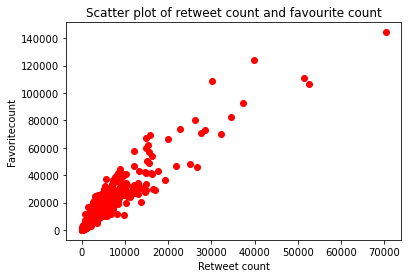

<Figure size 1440x1440 with 0 Axes>

In [223]:
plt.scatter(master_df.retweet_count,master_df.favorite_count,color='r')
plt.title('Scatter plot of retweet count and favourite count')
plt.xlabel('Retweet count')
plt.ylabel('Favoritecount')
plt.figure(figsize=(20,20));

